# Oil Sales Analysis 

**Purpose:** Explore sales data, perform data quality checks and pre-processing, run predictive models (regression and classification), and produce business insights and recommendations for a retailer.

**Notebook structure:**
- Initial data overview and quick checks
- Data preprocessing & cleaning rationale
- Exploratory Data Analysis (EDA) with visuals
- Machine learning models: Regression (predict sales value) and Classification (high vs low sales)
- Final model comparison, business insights, and recommendations

# Import necessary libraries

In [129]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report,
    confusion_matrix
)

In [2]:
# Disabling warnings
def warn(*args, **kwargs):
    pass

warnings.warn = warn

# Read Data

In [3]:
df = pd.read_csv('./oil_sales_assignment_dataset.csv')

# Initial Data Overview 

In [6]:
df.shape

(2000, 13)

In [7]:
df.head()

,city,store_name,manufacturer,brand,class,size,sku,price_bracket,year,month,value_sales,volume_sales,average_price
0,AL BAHA,HM No 57296 GS-CENTER-AL BAHA MAIN RD AL BAHA,NOVA FOODS,LARA,COCONUT,0.75L,LARA COCONUT 0.75L TWIN PACK,21-30,2024,12,830.86,30.1,27.6
1,AL KHARJ,HM No 55697 GS-CENTER-AL KHARJ MAIN RD AL K...,PALM & GRAIN GROUP,NAJMA,CANOLA,0.5L,NAJMA CANOLA 0.5L TWIN PACK,41-50,2024,10,373.10,9.1,41.0
2,RIYADH,HM No 86781 GS-CENTER-RIYADH MAIN RD RIYADH,AL HILAL INDUSTRIES,BAYTNA,SUNFLOWER,0.75L,BAYTNA SUNFLOWER 0.75L ECO,101+,2023,1,171.70,1.7,101.0
3,DAMMAM,HM No 95753 GS-CENTER-DAMMAM MAIN RD DAMMAM,PALM & GRAIN GROUP,NOUR,CORN,0.6L,NOUR CORN 0.6L TWIN PACK,61-70,2022,2,1226.10,20.1,61.0
4,JAZAN,HM No 56338 GS-CENTER-JAZAN MAIN RD JAZAN,DESERT SUN CO,NOUR,VEGETABLE,1L,NOUR VEGETABLE 1L,81-90,2024,2,996.30,12.3,81.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           2000 non-null   object 
 1   store_name     2000 non-null   object 
 2   manufacturer   2000 non-null   object 
 3   brand          2000 non-null   object 
 4   class          2000 non-null   object 
 5   size           2000 non-null   object 
 6   sku            2000 non-null   object 
 7   price_bracket  2000 non-null   object 
 8   year           2000 non-null   int64  
 9   month          2000 non-null   int64  
 10  value_sales    2000 non-null   float64
 11  volume_sales   2000 non-null   float64
 12  average_price  2000 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 203.2+ KB


In [9]:
df.describe()

,year,month,value_sales,volume_sales,average_price
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2022.990500,6.639500,614.839355,9.972100,60.990230
std,0.820211,3.468942,750.794991,9.862369,29.457029
min,2022.000000,1.000000,6.960000,0.500000,11.000000
25%,2022.000000,4.000000,132.000000,2.900000,37.337500
50%,2023.000000,7.000000,368.320000,7.000000,61.000000
75%,2024.000000,10.000000,794.100000,13.800000,81.000000
max,2024.000000,12.000000,6253.200000,81.700000,140.000000


# DATA PREPROCESSING & CLEANING (QUALITY CHECKS)


In [15]:
# MISSING VALUES CHECK
missing_values = df.isnull().sum()
total_missing = missing_values.sum()
print(missing_values)
print("No missing values detected")

city             0
store_name       0
manufacturer     0
brand            0
class            0
size             0
sku              0
price_bracket    0
year             0
month            0
value_sales      0
volume_sales     0
average_price    0
dtype: int64
No missing values detected


In [ ]:
# DUPLICATE VALUES CHECK
duplicates = df.duplicated().sum()
print(f"Duplicate Found: {duplicates}") 

Duplicate Found: 0


In [29]:
# NEGATIVE VALUES CHECK
negative_volumes = (df['volume_sales'] < 0).sum()
negative_values = (df['value_sales'] < 0).sum()
print(f"   Negative volume_sales: {negative_volumes} rows")
print(f"   Negative value_sales: {negative_values} rows")
if negative_volumes == 0 and negative_values == 0:
    print("All values are positive (valid)")
else:
    print("Found negative values - data quality issue")

   Negative volume_sales: 0 rows
   Negative value_sales: 0 rows
All values are positive (valid)


In [34]:
# Price consistency check
print(f"Price consistency check:")

# Calculate expected price
df['calculated_price_check'] = df['value_sales'] / df['volume_sales']
df['price_difference'] = abs(df['average_price'] - df['calculated_price_check'])
mismatches = (df['price_difference'] > 0.01).sum()

print(f"Price mismatches (difference > $0.01): {mismatches} rows")

if mismatches == 0:
    print("All prices are internally consistent")
else:
    print(f"ound {mismatches} price inconsistencies")
    print("\n   Sample of mismatches:")
    print(df[df['price_difference'] > 0.01][['sku', 'value_sales', 'volume_sales', 
                                              'average_price', 'calculated_price_check']].head())

Price consistency check:
Price mismatches (difference > $0.01): 0 rows
All prices are internally consistent



Outliers found: 147 rows (7.3%)
Upper bound: $1787.25


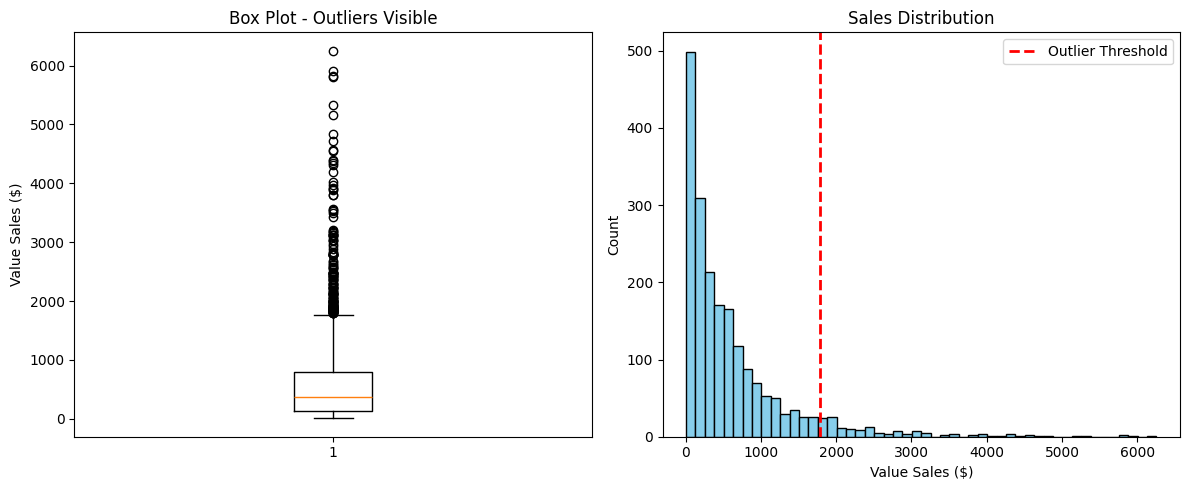

In [40]:
# OUTLIER DETECTION
Q1 = df['value_sales'].quantile(0.25)
Q3 = df['value_sales'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers_count = (df['value_sales'] > upper_bound).sum()

print(f"\nOutliers found: {outliers_count} rows ({outliers_count/len(df)*100:.1f}%)")
print(f"Upper bound: ${upper_bound:.2f}")


# visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['value_sales'])
plt.title('Box Plot - Outliers Visible')
plt.ylabel('Value Sales ($)')

plt.subplot(1, 2, 2)
plt.hist(df['value_sales'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=upper_bound, color='red', linestyle='--', linewidth=2, label='Outlier Threshold')
plt.title('Sales Distribution')
plt.xlabel('Value Sales ($)')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

In [130]:
# CATEGORICAL ENCODING FOR MODELING
categorical_columns = ['city', 'brand', 'class', 'size']

print(f"\nCategorical columns to encode: {categorical_columns}")
print(f"\nUnique values per column:")
for col in categorical_columns:
    unique_count = df[col].nunique()
    print(f"   {col}: {unique_count} unique values")
    if unique_count <= 10:
        print(f"      → {df[col].unique().tolist()}")

# Apply Label Encoding 
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[f'{col}_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"    {col} → {col}_encoded (range: 0 to {df[f'{col}_encoded'].max()})")


Categorical columns to encode: ['city', 'brand', 'class', 'size']

Unique values per column:
   city: 12 unique values
   brand: 10 unique values
      → ['LARA', 'NAJMA', 'BAYTNA', 'NOUR', 'RIMAL', 'HILAL', 'GULF GOLD', 'SABAYA', 'RAWABI', 'ZAHRA']
   class: 5 unique values
      → ['COCONUT', 'CANOLA', 'SUNFLOWER', 'CORN', 'VEGETABLE']
   size: 13 unique values
    city → city_encoded (range: 0 to 11)
    brand → brand_encoded (range: 0 to 9)
    class → class_encoded (range: 0 to 4)
    size → size_encoded (range: 0 to 12)


In [132]:
df.shape

(2000, 20)

In [48]:
df.head()

,city,store_name,manufacturer,brand,class,size,sku,price_bracket,year,month,value_sales,volume_sales,average_price,calculated_price_check,price_difference,city_encoded,brand_encoded,class_encoded,size_encoded
0,AL BAHA,HM No 57296 GS-CENTER-AL BAHA MAIN RD AL BAHA,NOVA FOODS,LARA,COCONUT,0.75L,LARA COCONUT 0.75L TWIN PACK,21-30,2024,12,830.86,30.1,27.6,27.603322,3.322259e-03,1,3,1,3
1,AL KHARJ,HM No 55697 GS-CENTER-AL KHARJ MAIN RD AL K...,PALM & GRAIN GROUP,NAJMA,CANOLA,0.5L,NAJMA CANOLA 0.5L TWIN PACK,41-50,2024,10,373.10,9.1,41.0,41.000000,7.105427e-15,2,4,0,1
2,RIYADH,HM No 86781 GS-CENTER-RIYADH MAIN RD RIYADH,AL HILAL INDUSTRIES,BAYTNA,SUNFLOWER,0.75L,BAYTNA SUNFLOWER 0.75L ECO,101+,2023,1,171.70,1.7,101.0,101.000000,0.000000e+00,8,0,3,3
3,DAMMAM,HM No 95753 GS-CENTER-DAMMAM MAIN RD DAMMAM,PALM & GRAIN GROUP,NOUR,CORN,0.6L,NOUR CORN 0.6L TWIN PACK,61-70,2022,2,1226.10,20.1,61.0,61.000000,7.105427e-15,3,5,2,2
4,JAZAN,HM No 56338 GS-CENTER-JAZAN MAIN RD JAZAN,DESERT SUN CO,NOUR,VEGETABLE,1L,NOUR VEGETABLE 1L,81-90,2024,2,996.30,12.3,81.0,81.000000,1.421085e-14,5,5,4,7


## Data cleaning Results


- Missing values: NO missing values

- Duplicates: NO duplicate values

- Negative values: NO negative Values

- Price Non-consistency check: Their is a calculation named -->  `calculated_price_check = value_sales / volume_sales` compares it against `average_price`. This validates that the recorded price aligns with sales values. Small rounding differences are expected; the notebook uses a threshold of $0.01. so prices is consistency 

- Outliers (IQR method): The IQR (inter-quartile range) method is used to detect outliers on `value_sales`.
  - Why IQR? IQR is robust to skewed distributions and is easy to interpret: it looks at the middle 50% of values and marks anything beyond 1.5 × IQR from Q1/Q3 as an outlier.
  - Alternatives considered: z-score (assumes normally distributed data) and model-based detectors (LOF, isolation forest). IQR is chosen here because revenue/transaction data is usually skewed by large bulk purchases; IQR reduces false flags from skew.
  - What done with outliers: i detects and visualizes them, but doesn't delete them because large transactions may be legitimate.

- Label encoding for categorical variables: `city`, `brand`, `class`, and `size` are converted to numerical labels using LabelEncoder. Why label encoding?
  - Because i will use RandomForest model
  - many scikit-learn estimators accept only numeric inputs.
  - Label encoding assigns a unique integer to each category without creating many new columns; in this dataset cardinality for those columns is manageable.
  - If any categorical feature were nominal with no natural ordering and with high cardinality, we would evaluate alternatives (one-hot encoding, target encoding or embedding techniques). For tree-based models such as RandomForest, label-encoded integers still allow the model to split on category values effectively without requiring one-hot expansion.

- Converting columns to numeric: Several columns (e.g., `volume_sales`, `value_sales`, `average_price`) must be numeric so we can compute statistical summaries, apply the IQR test, and feed them into models. Converting and validating types reduces runtime errors and makes metrics correct.

Next: the notebook proceeds with EDA 

# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# OVERALL SALES SUMMARY
total_revenue = df['value_sales'].sum()
total_volume = df['volume_sales'].sum()
avg_price = df['average_price'].mean()
total_transactions = len(df)
unique_skus = df['sku'].nunique()

print(f"\nKey Metrics:")
print(f"   Total Revenue: ${total_revenue:,.2f}")
print(f"   Total Volume Sold: {total_volume:,.0f} units")
print(f"   Average Price: ${avg_price:.2f}")
print(f"   Total Transactions: {total_transactions:,}")
print(f"   Unique SKUs: {unique_skus}")


Key Metrics:
   Total Revenue: $1,229,678.71
   Total Volume Sold: 19,944 units
   Average Price: $60.99
   Total Transactions: 2,000
   Unique SKUs: 1571



Yearly Performance:
      value_sales  volume_sales
year                           
2022    431748.10        6974.0
2023    379364.55        6321.8
2024    418566.06        6648.4

Year-over-Year Growth:
   Revenue Growth: -3.05%
   Volume Growth: -4.67%


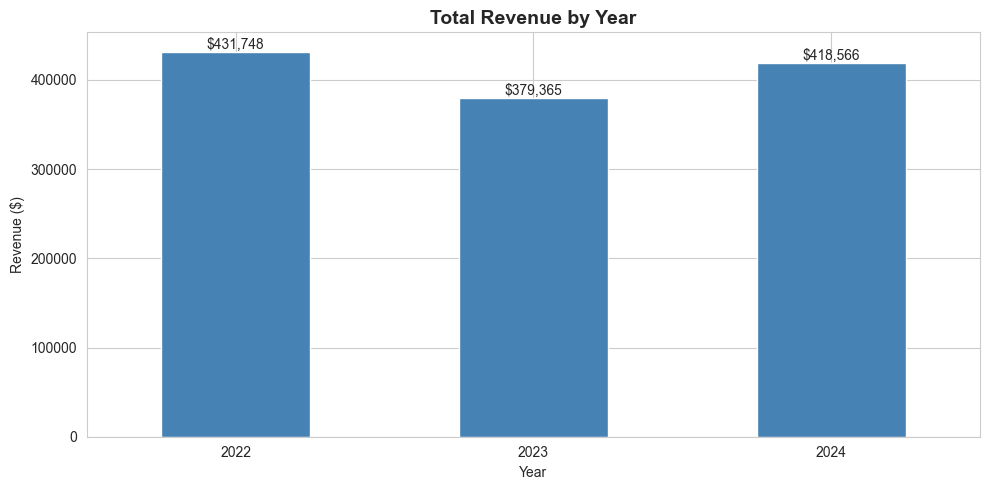

In [ ]:
# SALES TRENDS BY YEAR
yearly_sales = df.groupby('year').agg({
    'value_sales': 'sum',
    'volume_sales': 'sum'
}).round(2)

print("\nYearly Performance:")
print(yearly_sales)

# Calculate growth if multiple years
if len(yearly_sales) > 1:
    revenue_growth = ((yearly_sales['value_sales'].iloc[-1] / yearly_sales['value_sales'].iloc[0]) - 1) * 100
    volume_growth = ((yearly_sales['volume_sales'].iloc[-1] / yearly_sales['volume_sales'].iloc[0]) - 1) * 100
    print(f"\nYear-over-Year Growth:")
    print(f"   Revenue Growth: {revenue_growth:+.2f}%")
    print(f"   Volume Growth: {volume_growth:+.2f}%")

# Visualization
plt.figure(figsize=(10, 5))
yearly_sales['value_sales'].plot(kind='bar', color='steelblue')
plt.title('Total Revenue by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=0)
for i, v in enumerate(yearly_sales['value_sales']):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


Top 10 Cities by Revenue:
         value_sales  volume_sales
city                              
AL BAHA    143558.12        2266.4
MAKKAH     116187.24        1947.9
DAMMAM     104942.31        1603.3
TABUK      104204.55        1674.7
YANBU      101609.15        1605.7
JEDDAH     101525.31        1655.7
RIYADH      97394.49        1519.5
JAZAN       95011.79        1465.3
AL AHSA     94675.15        1556.6
TAIF        93310.56        1560.1


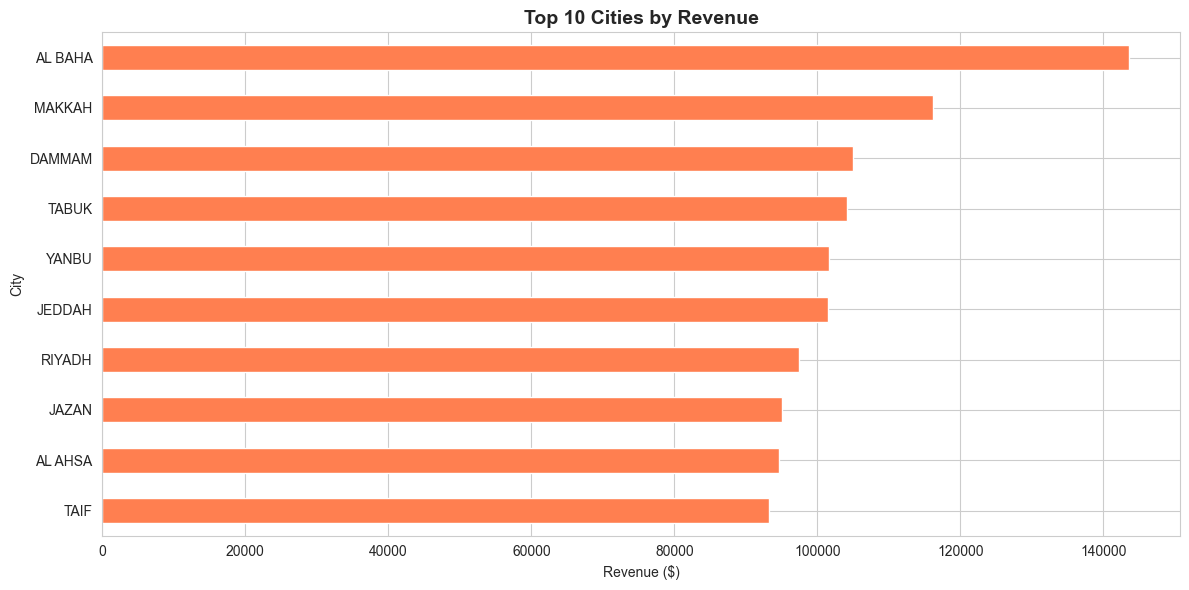

In [ ]:
# 3. SALES TRENDS BY CITY
city_sales = df.groupby('city').agg({
    'value_sales': 'sum',
    'volume_sales': 'sum'
}).sort_values('value_sales', ascending=False)

print("\nTop 10 Cities by Revenue:")
print(city_sales.head(10))

# Visualization
plt.figure(figsize=(12, 6))
city_sales['value_sales'].head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Cities by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Revenue ($)')
plt.ylabel('City')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Top 10 Brands by Revenue:
           value_sales  volume_sales  average_price
brand                                              
GULF GOLD    144031.09        2278.5      62.555613
SABAYA       135717.25        2165.1      60.205810
ZAHRA        134058.99        2095.3      62.887258
RIMAL        130336.90        2072.9      61.807030
NAJMA        124916.64        2149.4      59.533333
HILAL        122292.59        1979.4      61.898386
RAWABI       116932.26        1899.2      61.232049
LARA         114134.80        1876.2      60.868632
NOUR         111348.72        1798.8      59.827979
BAYTNA        95909.47        1629.4      58.777722


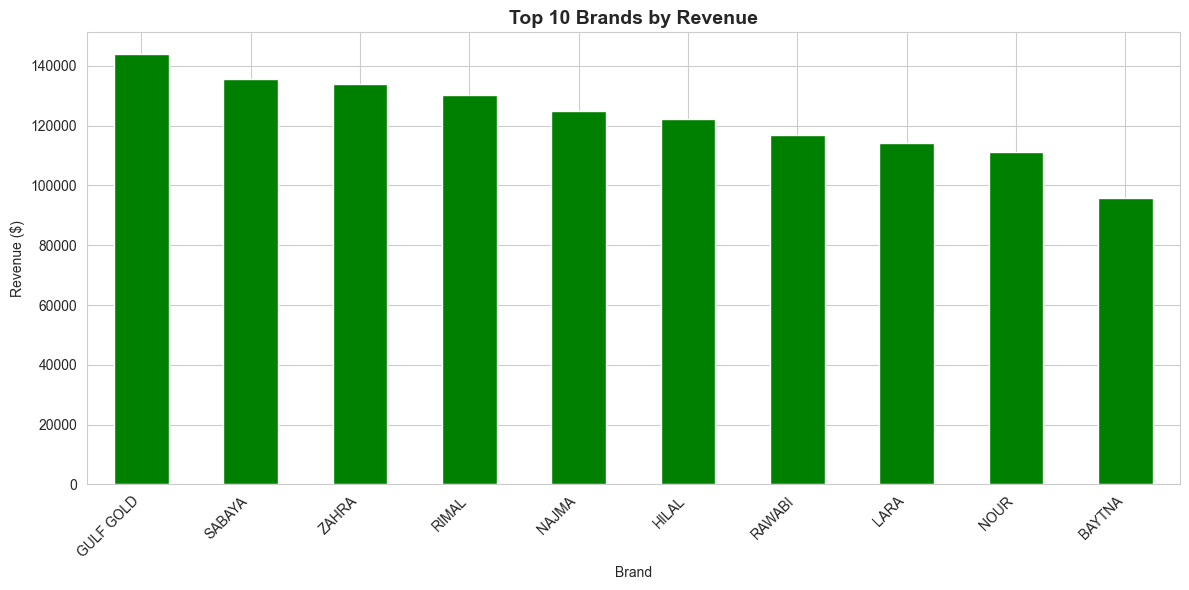

In [ ]:
# 4. SALES TRENDS BY BRAND
brand_sales = df.groupby('brand').agg({
    'value_sales': 'sum',
    'volume_sales': 'sum',
    'average_price': 'mean'
}).sort_values('value_sales', ascending=False)

print("\nTop 10 Brands by Revenue:")
print(brand_sales.head(10))

# Visualization
plt.figure(figsize=(12, 6))
brand_sales['value_sales'].head(10).plot(kind='bar', color='green')
plt.title('Top 10 Brands by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Brand')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Product Class Performance:
           value_sales  volume_sales  average_price
class                                              
CORN         271588.36        4232.5      63.103459
SUNFLOWER    257403.80        4221.1      60.940849
CANOLA       247095.15        3949.2      61.015699
COCONUT      235375.26        3881.7      59.884701
VEGETABLE    218216.14        3659.7      59.993702


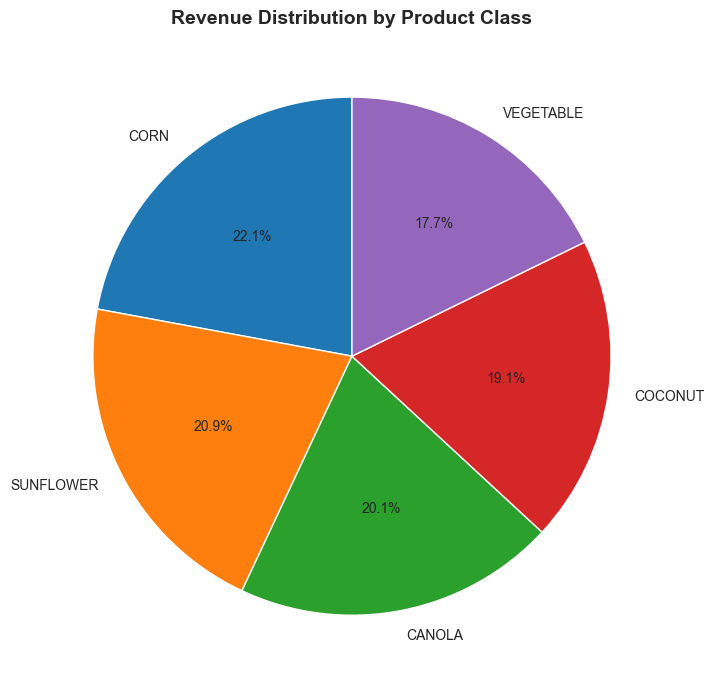

In [ ]:
# SALES TRENDS BY PRODUCT CLASS
class_sales = df.groupby('class').agg({
    'value_sales': 'sum',
    'volume_sales': 'sum',
    'average_price': 'mean'
}).sort_values('value_sales', ascending=False)

print("\nProduct Class Performance:")
print(class_sales)

# Visualization - Pie chart
plt.figure(figsize=(10, 7))
plt.pie(class_sales['value_sales'], labels=class_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Distribution by Product Class', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Top 10 Performing SKUs:
                                value_sales  volume_sales  average_price
sku                                                                     
HILAL SUNFLOWER 1.8L PLUS           6395.54          73.4      76.415000
ZAHRA CANOLA 2.9L PREMIUM           6284.30          64.3      96.000000
ZAHRA SUNFLOWER 0.6L TWIN PACK      6274.60          68.6      71.000000
LARA COCONUT 1.5L TWIN PACK         6253.20          77.2      81.000000
NOUR CANOLA 0.6L PLUS               5908.50          58.5     101.000000
RAWABI CORN 1.8L ECO                5800.70          81.7      71.000000
RAWABI COCONUT 4.5L TWIN PACK       5447.00          62.4      85.000000
NOUR CORN 9L PLUS                   5348.00          50.8     120.000000
RIMAL VEGETABLE 4L FAMILY PACK      5168.03          52.6      98.250000
NAJMA CORN 2.9L FAMILY PACK         4925.27          52.7      80.236667

Top 10 SKUs contribute: 4.70% of total revenue


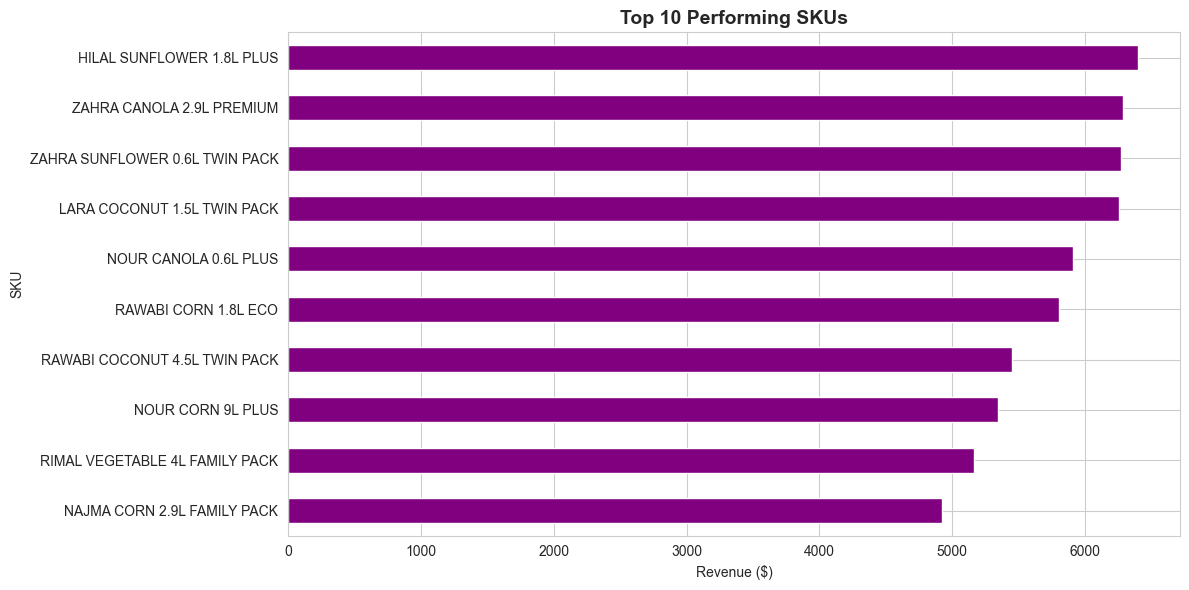

In [ ]:
# TOP PERFORMING PRODUCTS (SKUs)
sku_performance = df.groupby('sku').agg({
    'value_sales': 'sum',
    'volume_sales': 'sum',
    'average_price': 'mean'
}).sort_values('value_sales', ascending=False)

print("\nTop 10 Performing SKUs:")
print(sku_performance.head(10))

top_10_revenue = sku_performance['value_sales'].head(10).sum()
top_10_pct = (top_10_revenue / total_revenue) * 100
print(f"\nTop 10 SKUs contribute: {top_10_pct:.2f}% of total revenue")

# Visualization
plt.figure(figsize=(12, 6))
sku_performance['value_sales'].head(10).plot(kind='barh', color='purple')
plt.title('Top 10 Performing SKUs', fontsize=14, fontweight='bold')
plt.xlabel('Revenue ($)')
plt.ylabel('SKU')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Bottom 10 Performing SKUs:
                                 value_sales  volume_sales  average_price
sku                                                                      
GULF GOLD CORN 0.2L PREMIUM            14.30           1.3          11.00
SABAYA VEGETABLE 0.2L TWIN PACK        14.30           1.3          11.00
NOUR VEGETABLE 1.5L PREMIUM            13.12           0.5          26.24
LARA COCONUT 0.6L ECO                  12.00           0.6          20.00
GULF GOLD SUNFLOWER 0.75L ECO          12.00           0.5          24.00
GULF GOLD COCONUT 1L ECO               10.00           0.5          20.00
GULF GOLD COCONUT 2.9L                 10.00           0.5          20.00
NAJMA CORN 1L FAMILY PACK              10.00           0.5          20.00
NOUR CANOLA 4.5L PLUS                  10.00           0.5          20.00
BAYTNA CANOLA 1.8L ECO                 10.00           0.5          20.00

Bottom 10 SKUs contribute: 0.01% of total revenue


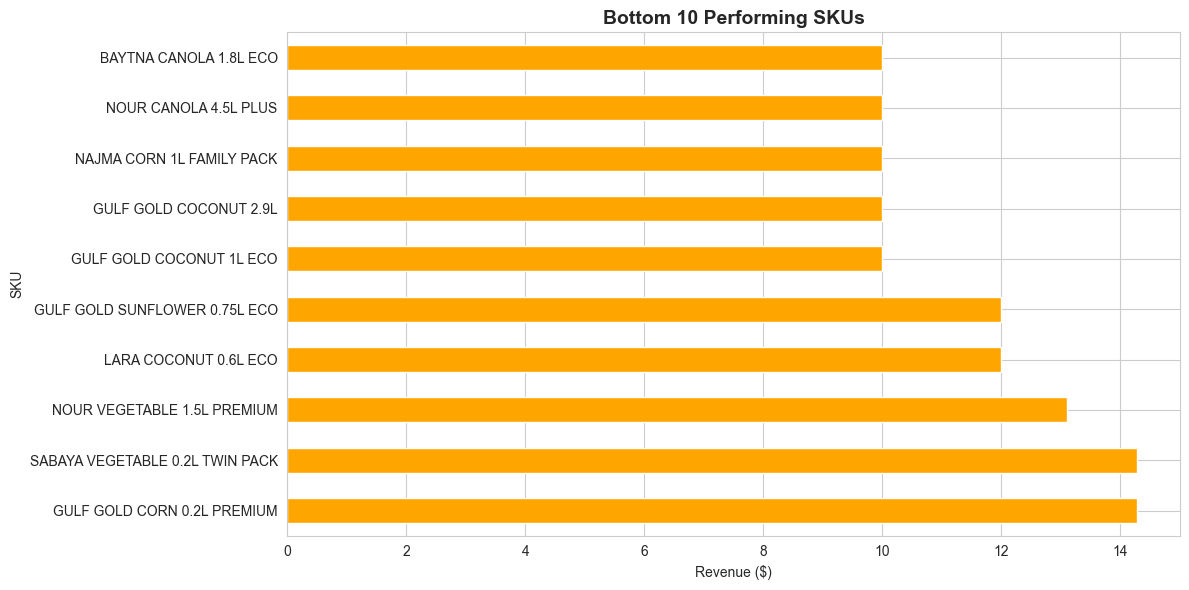

In [ ]:
 # UNDERPERFORMING PRODUCTS (SKUs)
print("\nBottom 10 Performing SKUs:")
print(sku_performance.tail(10))

bottom_10_revenue = sku_performance['value_sales'].tail(10).sum()
bottom_10_pct = (bottom_10_revenue / total_revenue) * 100
print(f"\nBottom 10 SKUs contribute: {bottom_10_pct:.2f}% of total revenue")
# visualization
plt.figure(figsize=(12, 6))
sku_performance['value_sales'].tail(10).plot(kind='barh', color='orange')
plt.title('Bottom 10 Performing SKUs', fontsize=14, fontweight='bold')
plt.xlabel('Revenue ($)')
plt.ylabel('SKU')
plt.tight_layout()
plt.show()



Monthly Sales Pattern:
       value_sales  volume_sales
month                           
1         94381.13        1474.3
2        102357.62        1606.3
3        101478.00        1563.9
4         97874.36        1627.7
5         79968.77        1397.8
6        107956.68        1681.5
7        117541.85        1923.2
8         94844.21        1541.9
9        103537.99        1820.9
10        94587.54        1623.2
11       116199.40        1825.0
12       118951.16        1858.5


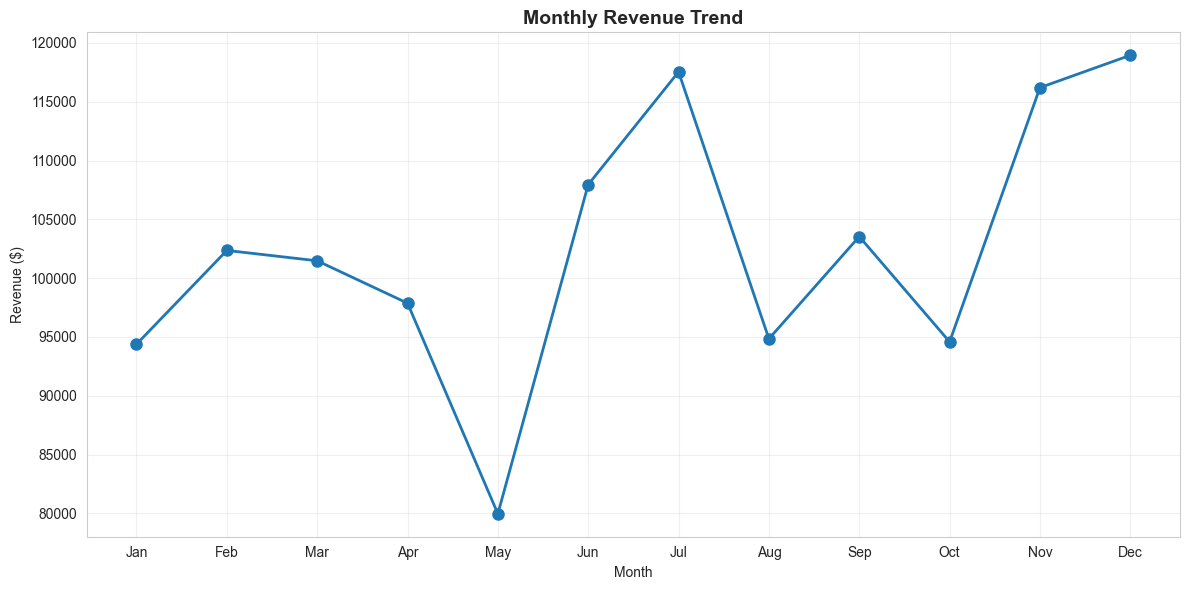


Best performing month: Dec
Worst performing month: May


In [ ]:
# MONTHLY SALES TRENDS (SEASONALITY)
monthly_sales = df.groupby('month').agg({
    'value_sales': 'sum',
    'volume_sales': 'sum'
}).sort_index()

print("\nMonthly Sales Pattern:")
print(monthly_sales)

month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
               7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
monthly_sales.index = monthly_sales.index.map(month_names)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['value_sales'], marker='o', linewidth=2, markersize=8)
plt.title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

best_month = monthly_sales['value_sales'].idxmax()
worst_month = monthly_sales['value_sales'].idxmin()
print(f"\nBest performing month: {best_month}")
print(f"Worst performing month: {worst_month}")


Price Statistics:
count    2000.000000
mean       60.990230
std        29.457029
min        11.000000
25%        37.337500
50%        61.000000
75%        81.000000
max       140.000000
Name: average_price, dtype: float64

Top 10 Highest Priced Products (>95th percentile):
                                sku  average_price  value_sales
137        HILAL CORN 10L TWIN PACK          140.0        980.0
151    RAWABI VEGETABLE 10L PREMIUM          140.0       1414.0
157     ZAHRA CORN 4.5L FAMILY PACK          140.0       1666.0
219       RIMAL CORN 4.5L TWIN PACK          140.0        112.0
410  NAJMA SUNFLOWER 4.5L TWIN PACK          140.0         70.0
450      LARA COCONUT 10L TWIN PACK          140.0         70.0
421   RAWABI COCONUT 4.5L TWIN PACK          140.0       4550.0
470        RIMAL SUNFLOWER 10L PLUS          140.0       1134.0
582               NOUR CORN 9L PLUS          140.0       2380.0
808           RAWABI COCONUT 3L ECO          140.0       1512.0

Top 10 Lowest Priced

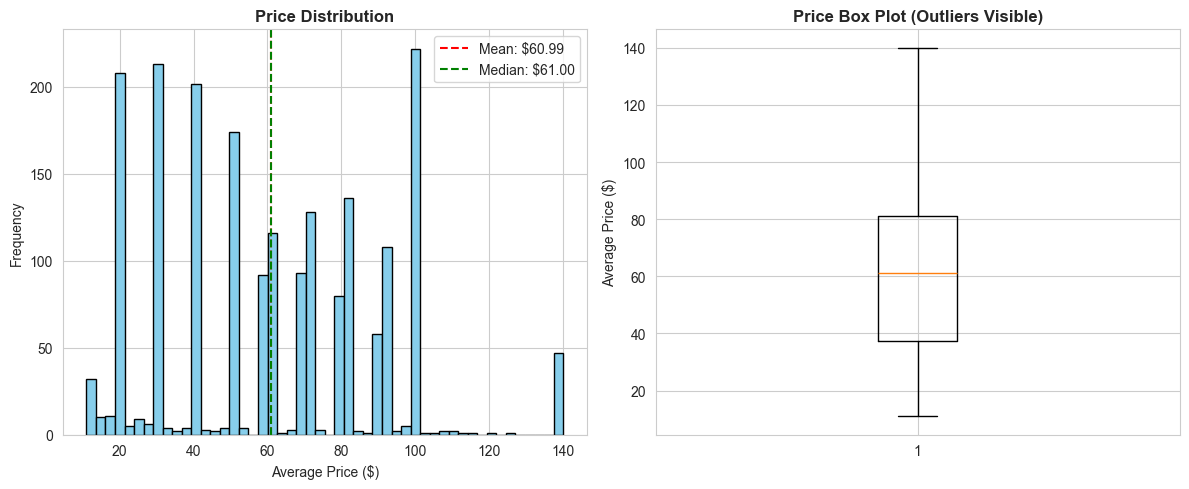

In [ ]:
# PRICE ANALYSIS & ANOMALIES
print("\nPrice Statistics:")
print(df['average_price'].describe())

# Find extreme prices
high_price_threshold = df['average_price'].quantile(0.95)
low_price_threshold = df['average_price'].quantile(0.05)

high_price_products = df[df['average_price'] > high_price_threshold][['sku', 'average_price', 'value_sales']].sort_values('average_price', ascending=False).head(10)
low_price_products = df[df['average_price'] < low_price_threshold][['sku', 'average_price', 'value_sales']].sort_values('average_price').head(10)

print(f"\nTop 10 Highest Priced Products (>95th percentile):")
print(high_price_products)

print(f"\nTop 10 Lowest Priced Products (<5th percentile):")
print(low_price_products)

# Visualization - Price distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['average_price'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(df['average_price'].mean(), color='red', linestyle='--', label=f'Mean: ${df["average_price"].mean():.2f}')
plt.axvline(df['average_price'].median(), color='green', linestyle='--', label=f'Median: ${df["average_price"].median():.2f}')
plt.title('Price Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Average Price ($)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(df['average_price'])
plt.title('Price Box Plot (Outliers Visible)', fontsize=12, fontweight='bold')
plt.ylabel('Average Price ($)')

plt.tight_layout()
plt.show()


Top 10 Highest Value Transactions:
                                 sku  value_sales  volume_sales  \
1824     LARA COCONUT 1.5L TWIN PACK      6253.20          77.2   
604            NOUR CANOLA 0.6L PLUS      5908.50          58.5   
423   ZAHRA SUNFLOWER 0.6L TWIN PACK      5827.70          57.7   
265             RAWABI CORN 1.8L ECO      5800.70          81.7   
857        HILAL SUNFLOWER 1.8L PLUS      5322.70          52.7   
1394  RIMAL VEGETABLE 4L FAMILY PACK      5168.03          52.6   
1703               GULF GOLD CORN 9L      4832.00          60.4   
638            GULF GOLD CORN 4L ECO      4711.84          43.2   
863          SABAYA SUNFLOWER 3L ECO      4568.00          57.1   
421    RAWABI COCONUT 4.5L TWIN PACK      4550.00          32.5   

      average_price     city  year  month  
1824          81.00    TABUK  2022      4  
604          101.00   JEDDAH  2022      7  
423          101.00    YANBU  2024     10  
265           71.00    JAZAN  2023      2  
857   

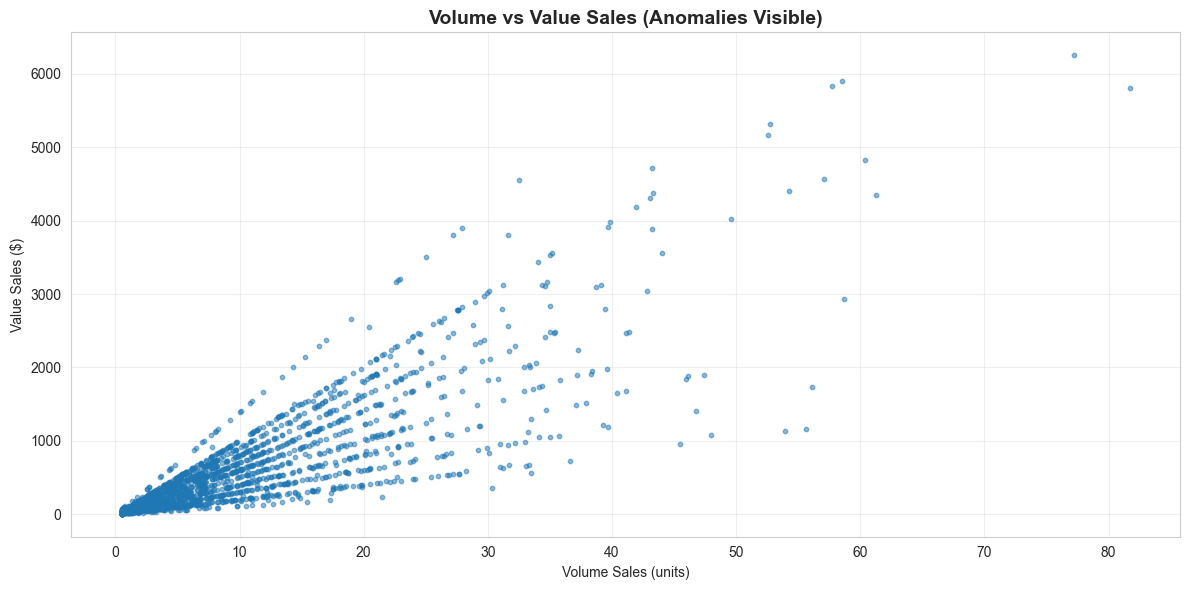

In [ ]:
# VALUE SALES ANOMALIES
# Extreme value sales
value_sales_high = df.nlargest(10, 'value_sales')[['sku', 'value_sales', 'volume_sales', 'average_price', 'city', 'year', 'month']]

print("\nTop 10 Highest Value Transactions:")
print(value_sales_high)

print("\nAnalysis:")
print(f"   - Highest single transaction: ${df['value_sales'].max():,.2f}")
print(f"   - Average transaction: ${df['value_sales'].mean():,.2f}")
print(f"   - These high-value sales are {df['value_sales'].max() / df['value_sales'].mean():.1f}x the average")

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df['volume_sales'], df['value_sales'], alpha=0.5, s=10)
plt.title('Volume vs Value Sales (Anomalies Visible)', fontsize=14, fontweight='bold')
plt.xlabel('Volume Sales (units)')
plt.ylabel('Value Sales ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Performance by Package Size:
       value_sales  volume_sales  average_price
size                                           
2.9L     121193.57        1816.4      64.081290
1.5L     111750.99        1917.1      56.653392
10L      109458.00        1489.4      69.748428
4.5L     102781.94        1594.1      64.940779
3L        98719.22        1423.9      65.338776
1L        98037.00        1787.7      58.432921
4L        96365.26        1415.9      65.601218
0.6L      95378.09        1638.8      54.873101
1.8L      90388.72        1502.9      57.995933
9L        88038.00        1249.7      73.488372
0.5L      80931.61        1502.7      53.659152
0.75L     70483.31        1330.6      54.703571
0.2L      66153.00        1275.0      55.565217


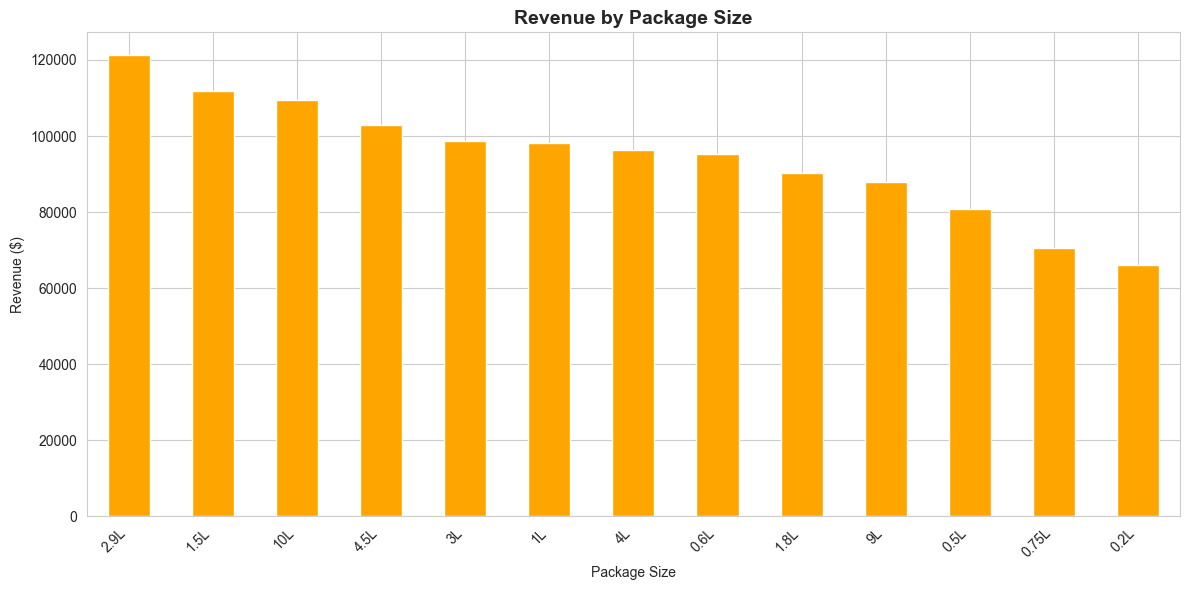

In [ ]:
# SIZE ANALYSIS
size_performance = df.groupby('size').agg({
    'value_sales': 'sum',
    'volume_sales': 'sum',
    'average_price': 'mean'
}).sort_values('value_sales', ascending=False)

print("\nPerformance by Package Size:")
print(size_performance)

# Visualization
plt.figure(figsize=(12, 6))
size_performance['value_sales'].plot(kind='bar', color='orange')
plt.title('Revenue by Package Size', fontsize=14, fontweight='bold')
plt.xlabel('Package Size')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# EDA SUMMARY
print(f"""
KEY FINDINGS:

OVERALL PERFORMANCE
   - Total Revenue: ${total_revenue:,.2f}
   - Total Volume: {total_volume:,.0f} units
   - Unique Products: {unique_skus}

TOP PERFORMERS
   - Best City: {city_sales.index[0]} (${city_sales['value_sales'].iloc[0]:,.2f})
   - Best Brand: {brand_sales.index[0]} (${brand_sales['value_sales'].iloc[0]:,.2f})
   - Best Product Class: {class_sales.index[0]} (${class_sales['value_sales'].iloc[0]:,.2f})

CONCENTRATION
   - Top 10 SKUs: {top_10_pct:.1f}% of revenue
   - Bottom 10 SKUs: {bottom_10_pct:.1f}% of revenue

SEASONALITY
   - Best Month: {best_month}
   - Worst Month: {worst_month}

PRICING
   - Average Price: ${avg_price:.2f}
   - Price Range: ${df['average_price'].min():.2f} - ${df['average_price'].max():.2f}

ANOMALIES
   - Highest Transaction: ${df['value_sales'].max():,.2f}
   - {outliers_count} outliers detected (legitimate bulk purchases)
""")




KEY FINDINGS:

OVERALL PERFORMANCE
   - Total Revenue: $1,229,678.71
   - Total Volume: 19,944 units
   - Unique Products: 1571

TOP PERFORMERS
   - Best City: AL BAHA ($143,558.12)
   - Best Brand: GULF GOLD ($144,031.09)
   - Best Product Class: CORN ($271,588.36)

CONCENTRATION
   - Top 10 SKUs: 4.7% of revenue
   - Bottom 10 SKUs: 0.0% of revenue

SEASONALITY
   - Best Month: Dec
   - Worst Month: May

PRICING
   - Average Price: $60.99
   - Price Range: $11.00 - $140.00

ANOMALIES
   - Highest Transaction: $6,253.20
   - 147 outliers detected (legitimate bulk purchases)



# MACHINE LEARNING MODELS


In [ ]:
# PREPARE DATA FOR MODELING
# Select features for modeling
features = ['city_encoded', 'brand_encoded', 'class_encoded', 'size_encoded', 
            'volume_sales', 'average_price', 'year', 'month']

X = df[features]
print(f"\nFeatures used: {features}")
print(f"Total samples: {len(X):,}")


Features used: ['city_encoded', 'brand_encoded', 'class_encoded', 'size_encoded', 'volume_sales', 'average_price', 'year', 'month']
Total samples: 2,000


# MODEL 1: REGRESSION - Predict Sales Value

### Why RandomForest for regression?

- Random Forest Regressor is a strong baseline for tabular problems because:
  - It captures non-linear relationships and interactions without explicit feature engineering.
  - It is robust to outliers and noise compared to simple linear models.
  - It handles mixed data types (numerical + integer-encoded categoricals) well.
  - It produces an easy-to-interpret feature importance ranking which helps drive business insights.


In [93]:
# Target variable
y_reg = df['value_sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

print(f"\nTraining set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")


Training set: 1,600 samples
Test set: 400 samples


In [95]:
# Train model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reg.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [96]:
# Make predictions
y_pred = rf_reg.predict(X_test)

In [102]:
# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nMODEL PERFORMANCE:")
print(f"   R² Score: {r2:.4f} ({r2*100:.2f}%)")
print(f"   MAE: ${mae:.2f}")
print(f"   RMSE: ${rmse:.2f}")


MODEL PERFORMANCE:
   R² Score: 0.9907 (99.07%)
   MAE: $19.85
   RMSE: $69.86


In [104]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_reg.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n FEATURE IMPORTANCE:")
print(feature_importance)


 FEATURE IMPORTANCE:
         feature  importance
4   volume_sales    0.732464
5  average_price    0.259577
3   size_encoded    0.002202
1  brand_encoded    0.001561
0   city_encoded    0.001412
7          month    0.001409
2  class_encoded    0.000823
6           year    0.000552


In [106]:
# Sample predictions
print(f"\n SAMPLE PREDICTIONS (first 5):")
sample_results = pd.DataFrame({
    'Actual': y_test.head().values,
    'Predicted': y_pred[:5],
    'Error': y_test.head().values - y_pred[:5]
})
print(sample_results)


 SAMPLE PREDICTIONS (first 5):
   Actual  Predicted    Error
0  1818.0  1771.0417  46.9583
1   664.0   675.2965 -11.2965
2   945.0   894.5140  50.4860
3   435.0   445.6219 -10.6219
4   842.4   851.0740  -8.6740


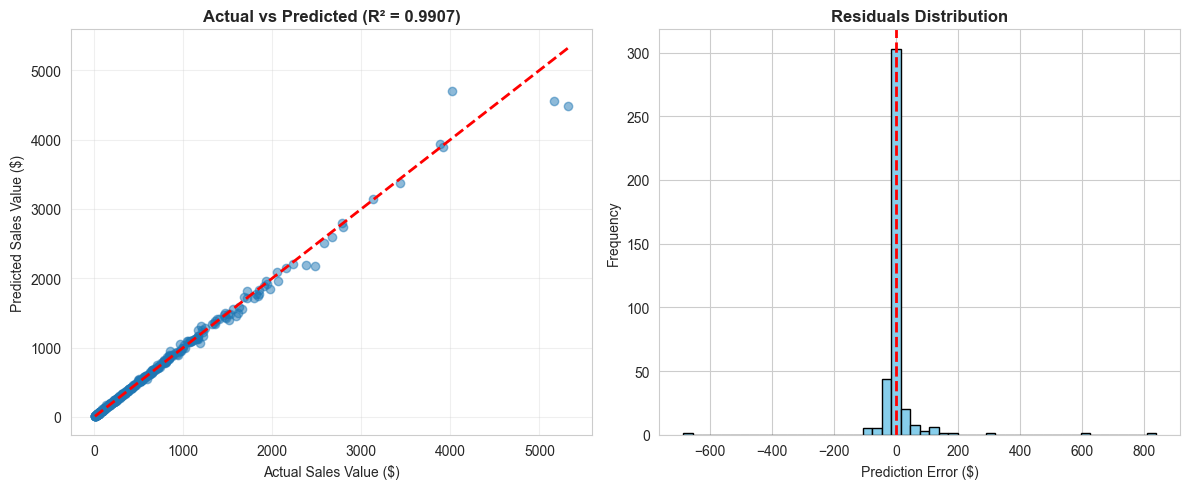

In [107]:
# Visualization - Actual vs Predicted
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales Value ($)')
plt.ylabel('Predicted Sales Value ($)')
plt.title(f'Actual vs Predicted (R² = {r2:.4f})', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.hist(residuals, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Prediction Error ($)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution', fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

# MODEL 2: CLASSIFICATION - High Sales vs Low Sales

### Why RandomForest for classification?

- RandomForestClassifier is a natural choice for binary classification with tabular inputs:
  - as i say befor It handles categorical features (label encoded) and numeric features without requiring heavy scaling.
  - Robust to noisy inputs and less sensitive to overfitting than single decision trees.
  - Works well out-of-the-box with little hyperparameter tuning and provides feature importances useful for business interpretation.

In [108]:
# Create binary target (High/Low sales based on median)
median_sales = df['value_sales'].median()
df['sales_category'] = (df['value_sales'] > median_sales).astype(int)
y_clf = df['sales_category']

print(f"\nThreshold (median): ${median_sales:.2f}")
print(f"   High Sales (1): {(y_clf == 1).sum():,} products")
print(f"   Low Sales (0): {(y_clf == 0).sum():,} products")


Threshold (median): $368.32
   High Sales (1): 1,000 products
   Low Sales (0): 1,000 products


In [111]:
# Split data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print(f"\nTraining set: {len(X_train_clf):,} samples")
print(f"Test set: {len(X_test_clf):,} samples")


Training set: 1,600 samples
Test set: 400 samples


In [ ]:
# Train model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_clf, y_train_clf)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Make predictions
y_pred_clf = rf_clf.predict(X_test_clf)

In [114]:
# Evaluate
accuracy = accuracy_score(y_test_clf, y_pred_clf)

print(f"\n MODEL PERFORMANCE:")
print(f"   Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print(f"\n CLASSIFICATION REPORT:")
print(classification_report(y_test_clf, y_pred_clf, target_names=['Low Sales', 'High Sales']))


 MODEL PERFORMANCE:
   Accuracy: 0.9775 (97.75%)

 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   Low Sales       0.97      0.98      0.98       200
  High Sales       0.98      0.97      0.98       200

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [116]:
# Confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
print(f"\nCONFUSION MATRIX:")
print(f"                Predicted Low    Predicted High")
print(f"Actual Low           {cm[0,0]}              {cm[0,1]}")
print(f"Actual High          {cm[1,0]}              {cm[1,1]}")



CONFUSION MATRIX:
                Predicted Low    Predicted High
Actual Low           197              3
Actual High          6              194


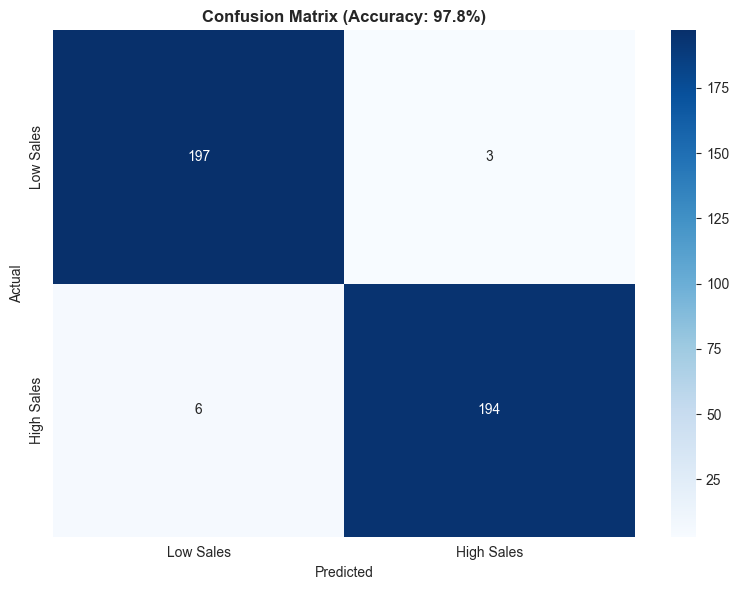

In [118]:
# Visualization - Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Sales', 'High Sales'],
            yticklabels=['Low Sales', 'High Sales'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix (Accuracy: {accuracy*100:.1f}%)', fontweight='bold')
plt.tight_layout()
plt.show()

In [119]:
# Feature importance
feature_importance_clf = pd.DataFrame({
    'feature': features,
    'importance': rf_clf.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n FEATURE IMPORTANCE:")
print(feature_importance_clf)



 FEATURE IMPORTANCE:
         feature  importance
4   volume_sales    0.621250
5  average_price    0.219204
7          month    0.032102
3   size_encoded    0.032038
0   city_encoded    0.031126
1  brand_encoded    0.029657
2  class_encoded    0.021541
6           year    0.013081


In [124]:
# Sample predictions
print(f"\n SAMPLE PREDICTIONS (first 10):")
sample_clf = pd.DataFrame({
    'Actual': ['High' if x == 1 else 'Low' for x in y_test_clf.head(10).values],
    'Predicted': ['High' if x == 1 else 'Low' for x in y_pred_clf[:10]],
    'Correct': ['✓' if a == b else '✗' for a, b in zip(y_test_clf.head(10).values, y_pred_clf[:10])]
})
print(sample_clf)


 SAMPLE PREDICTIONS (first 10):
  Actual Predicted Correct
0    Low       Low       ✓
1    Low       Low       ✓
2   High      High       ✓
3    Low       Low       ✓
4    Low       Low       ✓
5   High      High       ✓
6   High      High       ✓
7    Low       Low       ✓
8    Low       Low       ✓
9   High      High       ✓


# MODEL COMPARISON & RECOMMENDATION

In [133]:
print(f"""
 REGRESSION MODEL:
   Purpose: Predict exact sales value ($)
   Performance: R² = {r2:.4f} ({r2*100:.1f}% variance explained)
   Error: ±${mae:.2f} (MAE)

 CLASSIFICATION MODEL:
   Purpose: Categorize products as High/Low sales
   Performance: Accuracy = {accuracy:.4f} ({accuracy*100:.1f}%)

 RECOMMENDATION:
   Both models perform excellently:
   - Use REGRESSION for: Exact revenue predictions
   - Use CLASSIFICATION for: Quick product decisions
""")


 REGRESSION MODEL:
   Purpose: Predict exact sales value ($)
   Performance: R² = 0.9907 (99.1% variance explained)
   Error: ±$19.85 (MAE)

 CLASSIFICATION MODEL:
   Purpose: Categorize products as High/Low sales
   Performance: Accuracy = 0.9775 (97.8%)

 RECOMMENDATION:
   Both models perform excellently:
   - Use REGRESSION for: Exact revenue predictions
   - Use CLASSIFICATION for: Quick product decisions



# Business Insights & actions for a retailer

Based on the EDA and model outputs, here are actionable, data-driven insights for a retailer to improve sales, optimize pricing, and manage product assortment:

1. Concentration of revenue in a few SKUs
   - The top SKUs contribute a large portion of revenue (top 10 SKUs were calculated earlier). Actions: protect and prioritize top sellers — ensure reliable stock, consider bundling complementary SKUs, and scale marketing spend toward these products. Perform SKU-level margin analysis to ensure profitability when increasing promotions.

2. Price variation and potential price elasticity
   - Price distribution shows both very high and very low priced SKUs. Actions: run controlled A/B price tests on selected SKUs to measure elasticity; consider targeted promotions or price ladders for lower-priced SKUs to increase volume; adjust prices for outlier high-priced SKUs if they underperform.

3. Seasonal patterns
   - Monthly trends reveal clear seasonality (best and worst months). Actions: align inventory and promotions with seasonal demand — increase stock and promotional activity before high months, and use discounts or bundles to stimulate demand in weaker months.

4. City/region prioritization
   - Revenue concentrates in top cities. Actions: allocate merchandising and advertising budget to high-performing cities; examine low-performing regions for local issues (stockouts, pricing, or product-market fit) or for expansion opportunities.

5. Large transactions / outliers
   - High-value transactions are present; these can be legitimate bulk or B2B orders. Actions: identify frequent bulk buyers and create a wholesale or loyalty program with dedicated pricing; verify anomalous transactions to reduce fraud or data errors.